# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [25]:
df_normalized = pd.read_csv("/content/drive/MyDrive/Clustering Classification/hasil_clustering_v2.csv")
df_normalized.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Lead Time,Lead Time Binned,Cluster
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420.0,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,0.523507,0.428571,0,1
1,3,CA-2017-138688,2017-06-12,2017-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,90036.0,3,OFF-LA-10000240,1,10,Self-Adhesive Address Labels for Typewriters b...,0.028378,0.571429,0,0
2,5,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311.0,2,OFF-ST-10000760,1,14,Eldon Fold 'N Roll Cart System,0.043888,1.000000,1,0
3,6,CA-2015-115812,2015-06-09,2015-06-14,3,BH-11710,Brosina Hoffman,0,United States,Los Angeles,...,90032.0,3,FUR-FU-10001487,0,9,Eldon Expressions Wood and Plastic Desk Access...,0.096920,0.714286,1,0
4,7,CA-2015-115812,2015-06-09,2015-06-14,3,BH-11710,Brosina Hoffman,0,United States,Los Angeles,...,90032.0,3,OFF-AR-10002833,1,2,Newell 322,0.013684,0.714286,1,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [30]:

# X = df_normalized[['Ship Mode', 'Segment', 'Region', 'Cluster']]
X = df_normalized[['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Lead Time Binned']]
y = df_normalized['Cluster']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [31]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)
y_pred = rf_model.predict(X_test_scaled)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Menangani masalah data tidak seimbang menggunakan **SMOTE**.

SMOTE (Synthetic Minority Over-sampling Technique) bekerja dengan cara membuat data sintetis pada kelas minoritas, sehingga distribusi kelas menjadi lebih seimbang dan model tidak bias terhadap kelas mayoritas.


2. Algoritma yang digunakan adalah **Random Forest Classifier**.

Algoritma bekerja dengan membangun banyak *decision tree* secara acak dan menggabungkan hasil prediksinya untuk meningkatkan akurasi serta mengurangi risiko overfitting.

Beberapa parameter utama :

* **n_estimators**: jumlah pohon yang digunakan dalam ensemble.
* **max_depth**: kedalaman maksimum pohon keputusan.
* **min_samples_split** dan **min_samples_leaf**: mengatur jumlah minimum sampel untuk membagi node dan jumlah minimum sampel pada daun pohon.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Hasil Evaluasi Model Klasifikasi
Akurasi (Accuracy)   : 0.9445
F1-Score             : 0.9452
Presisi (Precision)  : 0.9469
Recall               : 0.9445

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       573
           1       0.87      0.94      0.90       467
           2       0.98      0.95      0.97       690

    accuracy                           0.94      1730
   macro avg       0.94      0.94      0.94      1730
weighted avg       0.95      0.94      0.95      1730



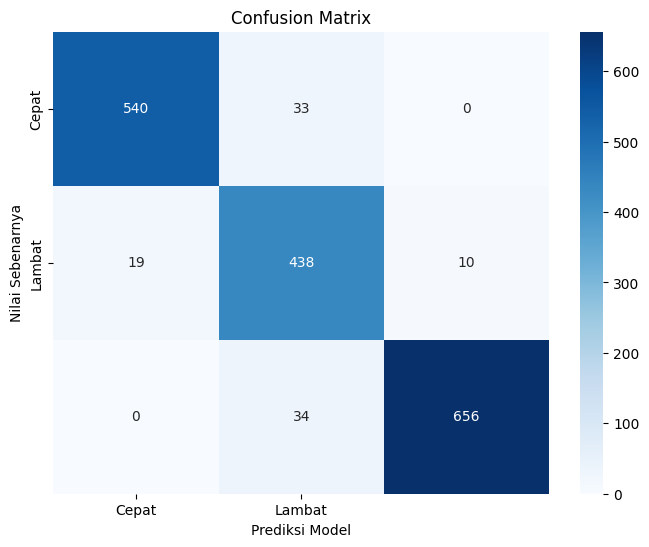

In [32]:
# y_pred = best_rf_model.predict(X_test_scaled)
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')



print("==============================================")
print("Hasil Evaluasi Model Klasifikasi")
print("==============================================")
print(f"Akurasi (Accuracy)   : {accuracy:.4f}")
print(f"F1-Score             : {f1:.4f}")
print(f"Presisi (Precision)  : {precision:.4f}")
print(f"Recall               : {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Cepat', 'Lambat'],
            yticklabels=['Cepat', 'Lambat'])

plt.xlabel('Prediksi Model')
plt.ylabel('Nilai Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [33]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)
# best_rf_model = grid_search.best_estimator_
rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(X_test_scaled)

print("Best Hyperparameters:\n", grid_search.best_params_)

Best Hyperparameters:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Hasil Evaluasi Model Setelah Tuning
Akurasi  : 0.9462
F1-Score : 0.9470
Presisi  : 0.9494
Recall   : 0.9462


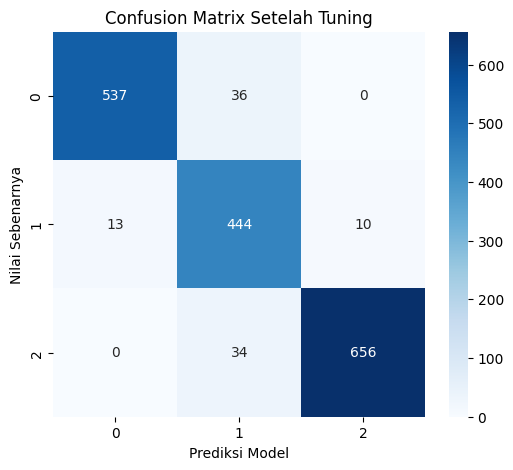

In [38]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("=====================================================")
print("Hasil Evaluasi Model Setelah Tuning")
print("=====================================================")
print(f"Akurasi  : {accuracy:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Setelah Tuning")
plt.xlabel("Prediksi Model")
plt.ylabel("Nilai Sebenarnya")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Evaluasi dan Analisis Model Klasifikasi Sebelum dan Setelah Tuning

## 1. Perbandingan Hasil Evaluasi

Berikut merupakan hasil evaluasi model klasifikasi sebelum dan setelah dilakukan tuning hyperparameter:

| Metrik     | Sebelum Tuning | Setelah Tuning |
|------------|----------------|----------------|
| Akurasi    | 0.9445         | 0.9462         |
| F1-Score   | 0.9452         | 0.9470         |
| Presisi    | 0.9469         | 0.9494         |
| Recall     | 0.9445         | 0.9462         |

Dari tabel di atas terlihat bahwa setelah tuning hyperparameter, terjadi peningkatan performa model pada semua metrik evaluasi, meskipun peningkatannya relatif kecil.

Hal ini menunjukkan bahwa proses tuning berhasil mengoptimalkan model sehingga prediksi menjadi lebih akurat dan seimbang.

## 2. Analisis Kelemahan Model


- **Presisi dan Recall untuk kelas 1 sedikit lebih rendah** dibanding kelas 0 dan 2, dengan presisi 0.87 dan recall 0.94. Dapat diartikan model terkadang menghasilkan false positive pada kelas 1, meskipun recall-nya cukup baik.
- Presisi dan recall yang tinggi pada kelas 0 dan 2 menunjukkan model cukup baik dalam mengenali kedua kelas tersebut.

## 3. Apakah Model Mengalami Overfitting atau Underfitting?

- Dilihat dari tingkat akurasi yang cukup tinggi pada data uji menunjukkan model tidak mengalami underfitting.
- Jika performa pada data latih jauh lebih tinggi dibanding data uji, maka menunjukkan indikasi overfitting. Namun, jika perbedaan performa kecil, model dapat dikatakan cukup general.

## 4. Rekomendasi Tindakan Lanjutan

- Mengumpulkan data tambahan agar model dapat belajar pola yang lebih representatif.
- Mencoba algoritma lain yang mungkin memberikan performa lebih baik.
- Penyesuaian threshold klasifikasi untuk mengoptimalkan presisi dan recall sesuai kebutuhan.
- Cross-validation yang lebih detail untuk memastikan kestabilan performa model.